# 1. Why EDA (Exploratory Data Analysis)?

- To summarize main characteristics of data
- To uncover relationship between variables
- To extract improtant variables

# 2. How EDA?

- Descriptive Statistics
- GroupBy -> Pivot -> Heatmap
- Correlation (for continuous variables)
- Advanced Correlation - Statistics (for continuous variables)
- Chi-Square (for categorical variables) - test association between two categorical variables
- ANOVA - categorical value as X, continuous value as y, i.e. find the relationship between categorical and continuous variables

## 2.1 Descriptive Statistics

> df.describe() for continuous/numerical values

- NaN will be skipped in statistics
- Output:

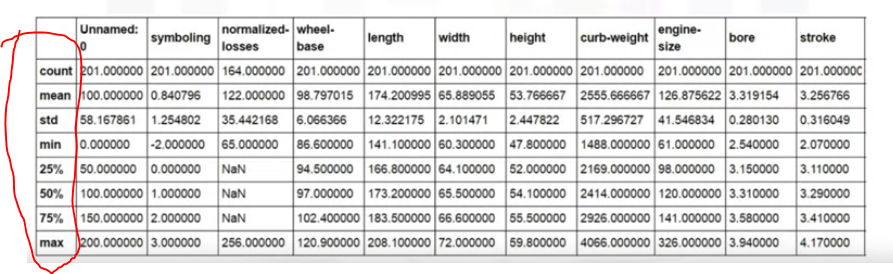

> df.describe(include=['object']) to include object type (discrete/categorical) values

- Output:
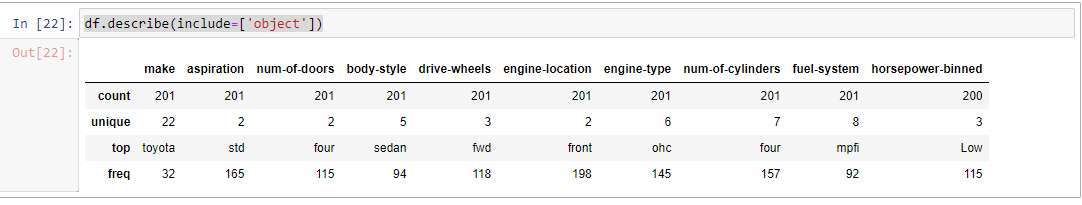

> df.value_counts() for discrete/categorical values

- Output:
    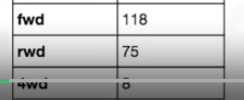

> Box Plot - x axis is categorical value, y axis is continuous value

- Output:
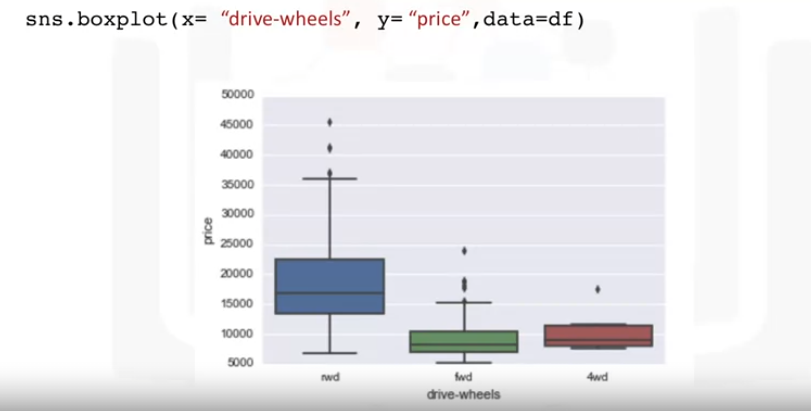

> Scatter Plot - both x and y axis is continuous value

- Output:
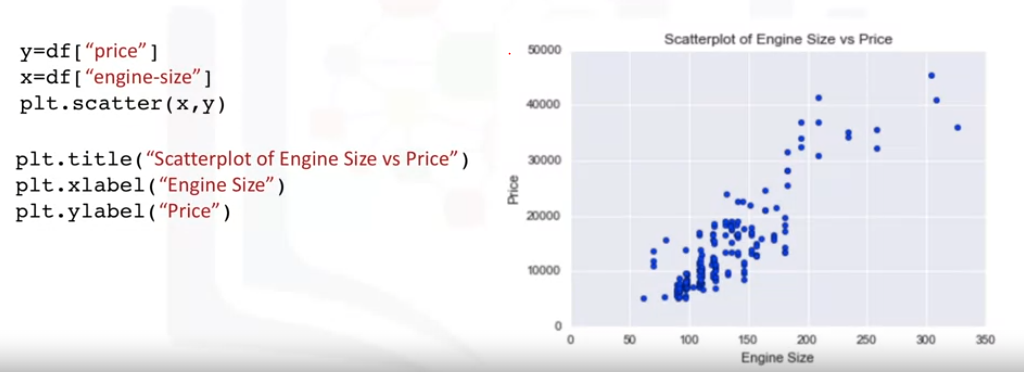

## 2.2 GroupBy -> Pivot -> Heatmap

> df.groupby()

- applied on categorical variables, and can be used to get .mean() of each categorical combination
- example: say we are interested in how the prices varies depending on categories of "drive-wheels" or "body-style"
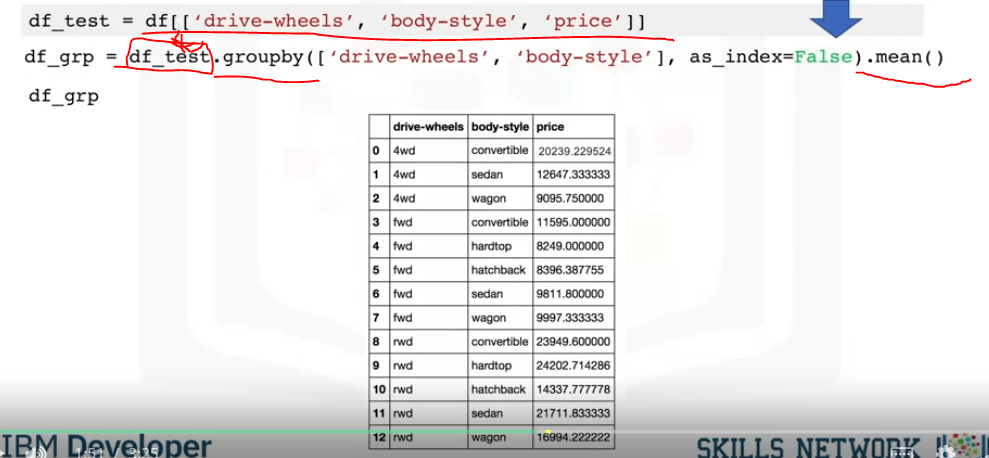



> df.pivot()

- applied on categorical values, output similar to Excel pivot table format
- Example: the example above is not very good to visualize, therefore we can use pivot table to convert the above example's output to a pivot table, with drive-wheels and body-style categorical variables listed as row index and column header, and price as the content of table

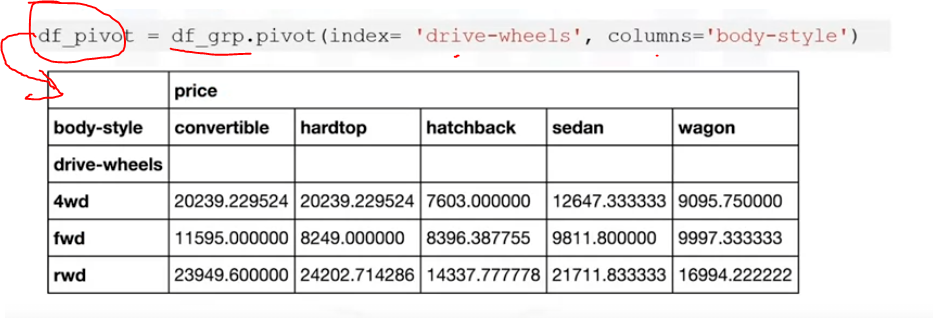


> Heatmap

- can be applied on pivot table (retangular grid table)
- Example: visualize the price high/low using color
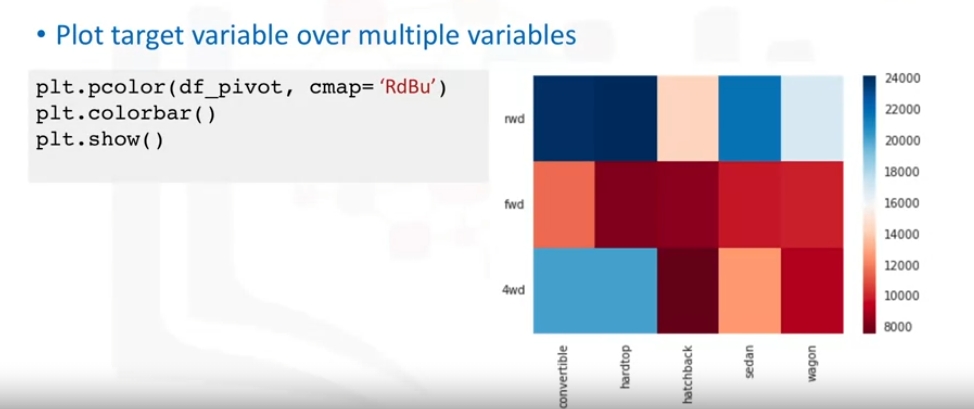

## 2.3 Correlation (for continuous variables)

- Correlation does not imply causation
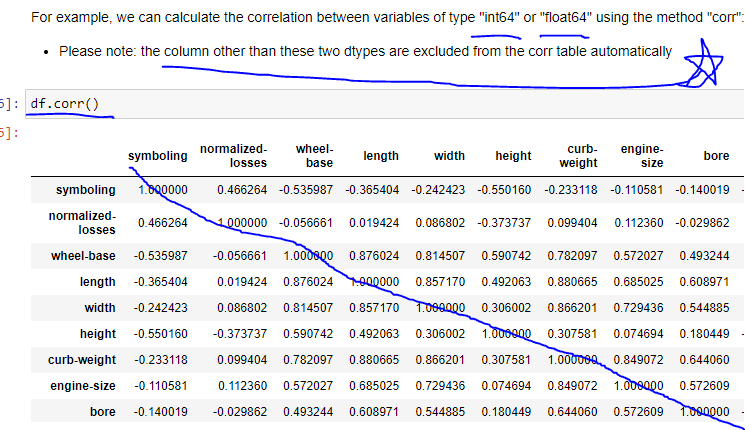

- We can find the corr() against one output y (e.g. "price"), and sort the corr() value:
> df.corr()['price'].sort_values()
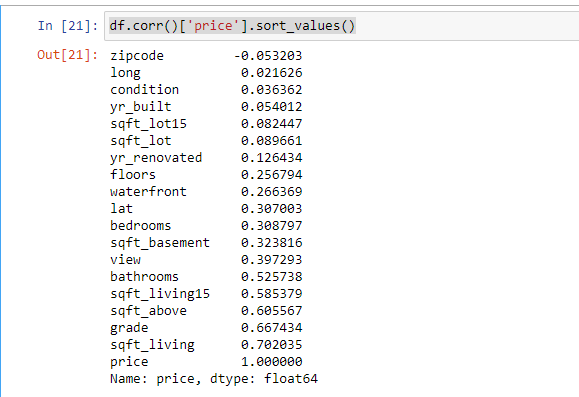

- Example of a positive linear relationship type of correlation
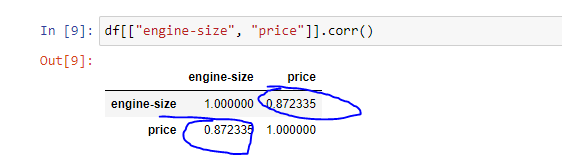
--> import seaborn as sns
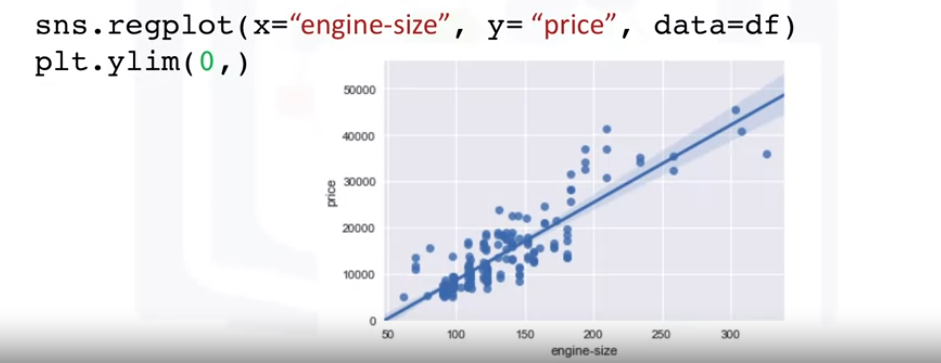

## 2.4 Advanced Correlation - Statistics (for continuous variables)

> Pearson Correlation (note: Pearson Correlation is the default method of the function ".corr()" as above).

- Measure strength of correlation between two features
    - Correlation Coefficient
        - close to -1: strong negative relationship
        - close to 1: strong potitive relationship
        - close to 0: no relationship
    - P-value
        - <0.001: Strong certainty
        - <0.05: Moderate certainty
        - <0.1: Weak certainty
        - \>0.1: No certainty
    - Diff between the two indicators above?
        - Correlation coefficient imply strong or weak correlation
        - P-value imply how confident to accept the result above

- Example:
--> from scipy import stats
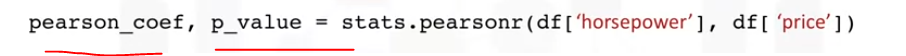

> Heatmap

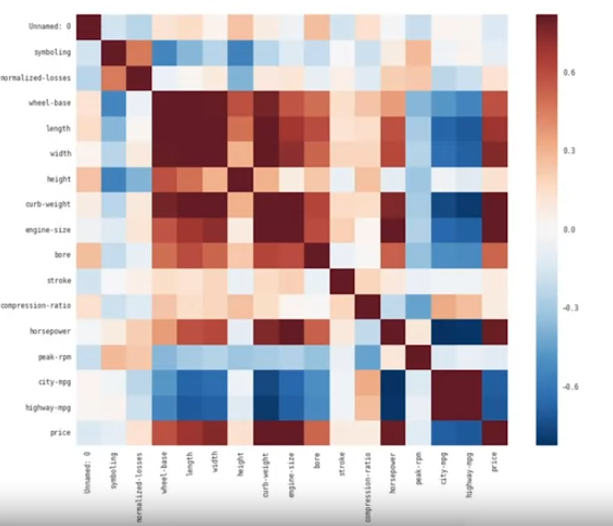

## 2.5 Chi-Square (for categorical variables) - test association between two categorical variables

- "Association" means: how independent or dependent that two categorical variables are
- Chi-Square tests a null hypothesis that the two variables are independent.
- After obtain Chi-Square (formula see below), we refer to Chi-Square table to obtain p-value (same def'n as p-value above), then check what range P-value falls under
- e.g. if <0.05, then it is 95% confident/certain to reject the null hypothesis, i.e. two varialbes are dependent.

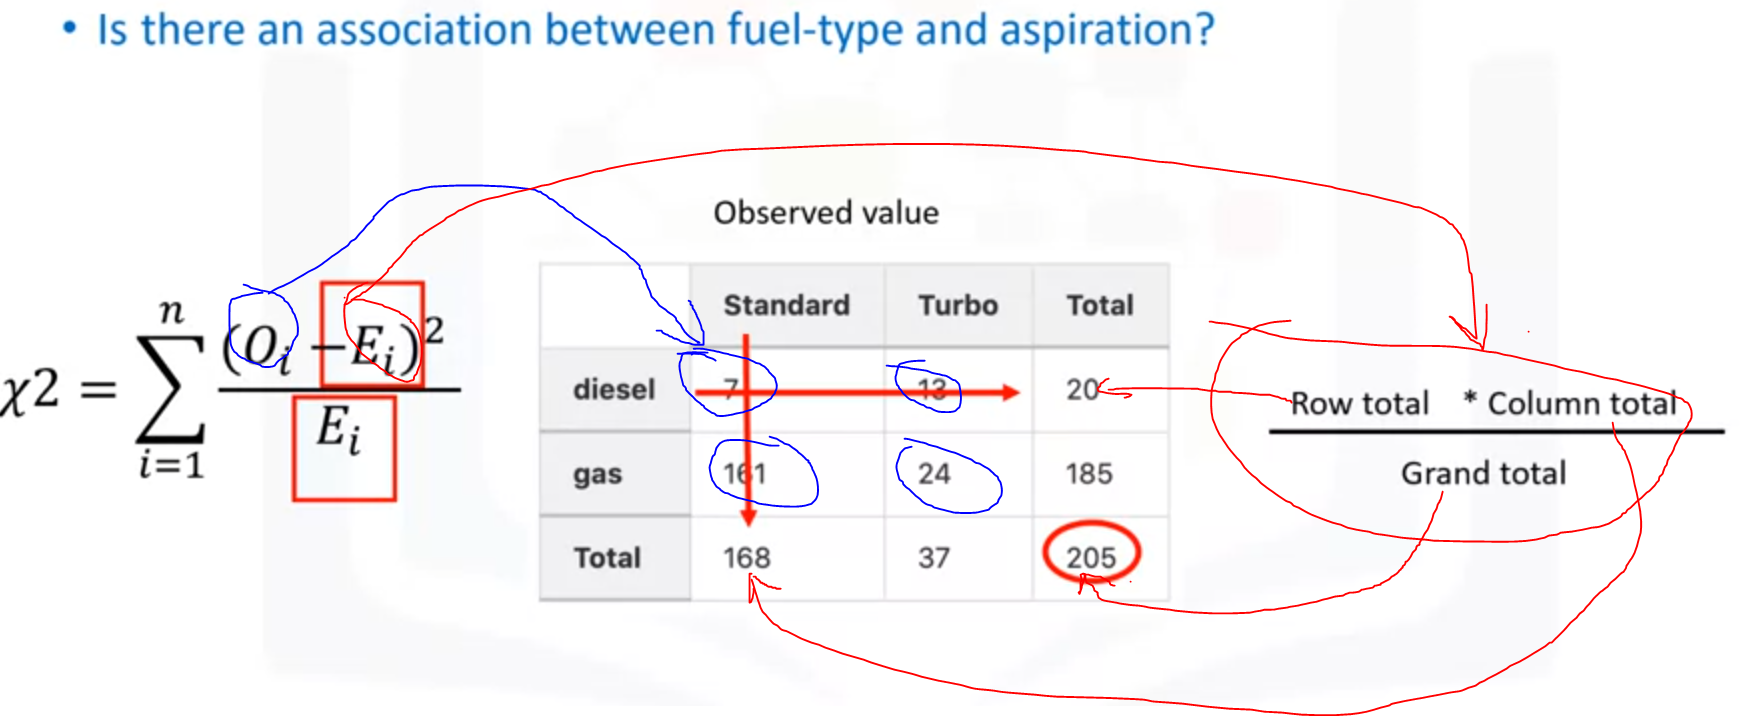

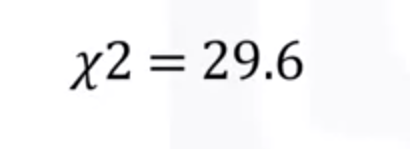
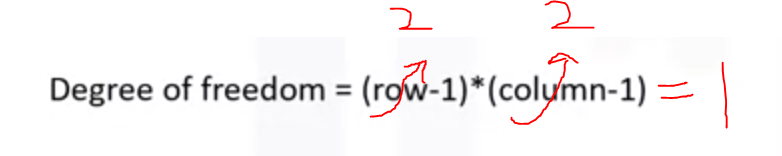

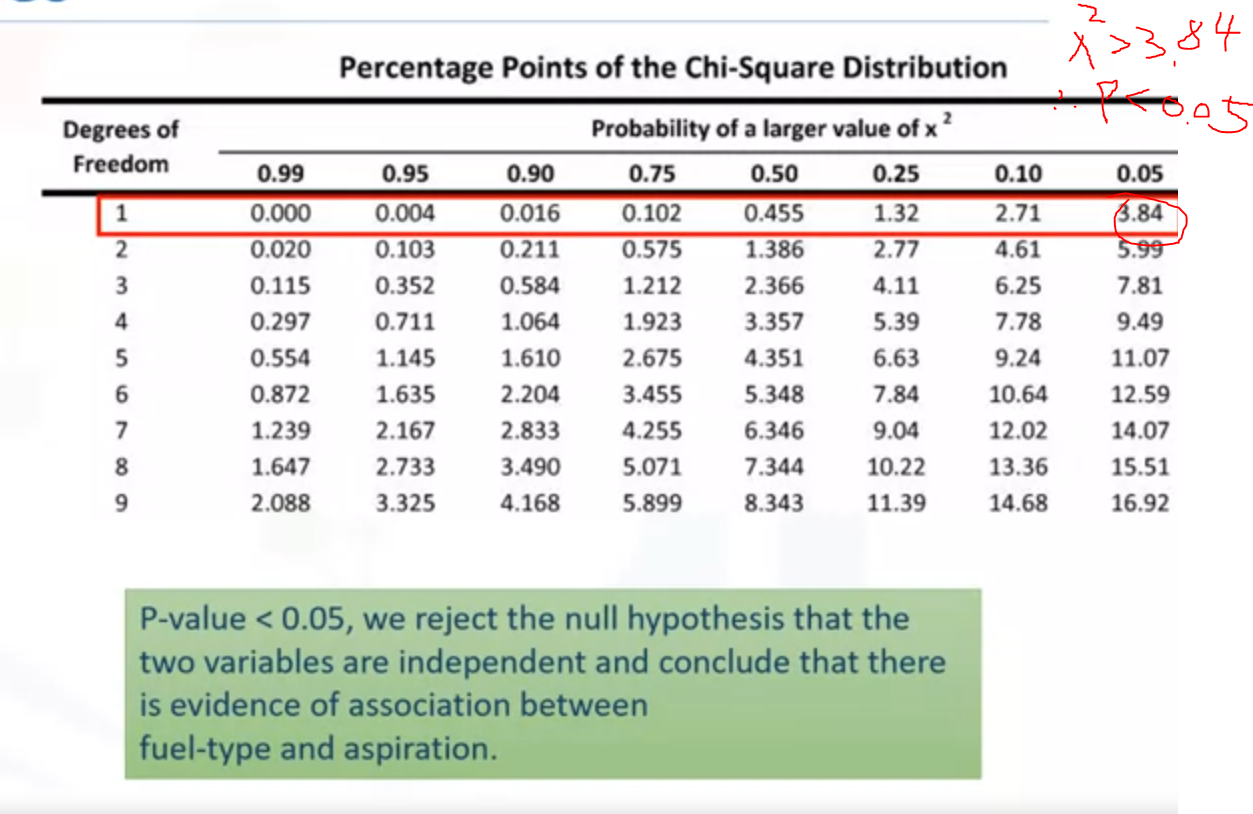

- **We can also use one line of python code to finish the calculation above**

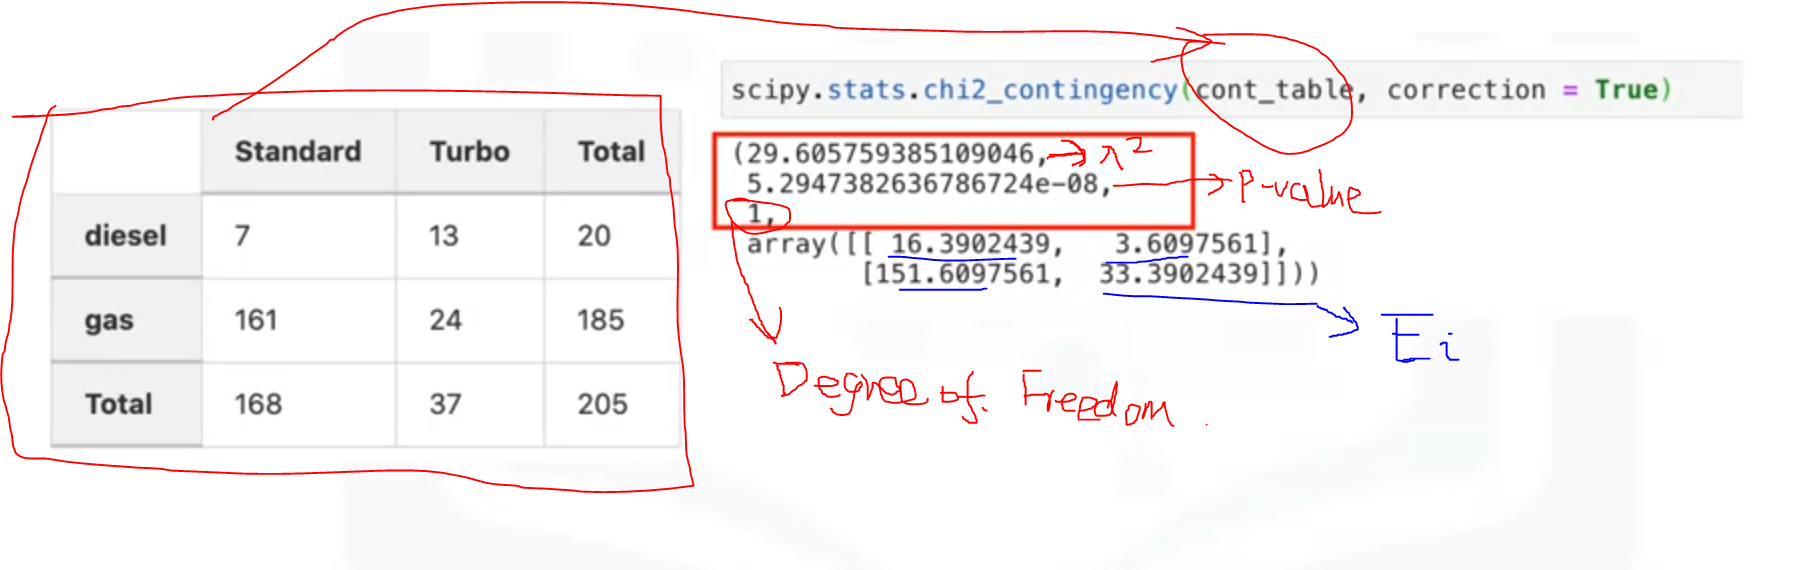

## 2.6 ANOVA (Analysis of Variance)

- Apply on categorical value as X, continuous value as y, i.e. find the relationship between categorical and continuous variables
- How? : ANOVA test whether mean (y) value of each X group are significant different from each other.

- It needs to use .groupby() method to get groupby object including lists of y for all X groups
    - note: ANOVA will auto calculate mean() for each group, so we don't need to use groupby()**.mean()** to calculate mean beforehand.

- Then use .get_group() method to get list of y for each X group -> (a series object)

- Then feed into stats.f_oneway() method to obtain results

- e.g. We would like to find if different types of "Drive-Wheels" (x) impact "Price"（y)
    - a. use .groupby() to obtain a groupby object containing price and drive-wheels
    - b. use .get_group() to obtain a list of price for each drive-wheels group, e.g. 4wd, 2wd, rwd, ...
    - c. use ANOVA method [stats.f_oneway()] to calculate:
        - 1). F-Score: the larger the more difference for each group's means, which means impact of X to y is larger
        - 2). P-value: stats signficance, same def'n as p-value as above.

- Example: See Lab 1. Section 6